In [1]:
from statistics import mean
import pandas as pd
import wget
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import calendar
import os
from datetime import datetime

In [2]:
os.getcwd()

'C:\\Users\\Joker\\Documents\\GitHub'

In [3]:
path='E:\\US_Accidents_Dec21_updated.csv'

In [4]:
df=pd.read_csv(path)

In [5]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec']

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df2=pd.read_csv(path,usecols=['End_Time'])

In [9]:
df2
df2.dtypes

End_Time    object
dtype: object

In [10]:
df2['End_Time']=pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df2.dtypes

End_Time    datetime64[ns]
dtype: object

In [12]:
df2['Year']= df2['End_Time'].dt.year

In [13]:
df2

,End_Time,Year
0,2016-02-08 06:37:08,2016
1,2016-02-08 11:56:20,2016
2,2016-02-08 12:15:39,2016
3,2016-02-08 12:51:45,2016
4,2016-02-08 13:53:43,2016
...,...,...
2845337,2019-08-23 18:32:01,2019
2845338,2019-08-23 19:38:23,2019
2845339,2019-08-23 19:28:49,2019
2845340,2019-08-23 19:29:42,2019


In [14]:
df2['Quarter']= df2['End_Time'].dt.quarter

In [15]:
df2

,End_Time,Year,Quarter
0,2016-02-08 06:37:08,2016,1
1,2016-02-08 11:56:20,2016,1
2,2016-02-08 12:15:39,2016,1
3,2016-02-08 12:51:45,2016,1
4,2016-02-08 13:53:43,2016,1
...,...,...,...
2845337,2019-08-23 18:32:01,2019,3
2845338,2019-08-23 19:38:23,2019,3
2845339,2019-08-23 19:28:49,2019,3
2845340,2019-08-23 19:29:42,2019,3


In [16]:
df2['Month']= df2['End_Time'].dt.month

In [17]:
df2['Day']= df2['End_Time'].dt.day

In [18]:
df2['Hour']= df2['End_Time'].dt.hour

In [19]:
df2['DayofWeek']= df2['End_Time'].dt.dayofweek

In [20]:
df2['DayofYear']= df2['End_Time'].dt.dayofyear

In [21]:
df2['MonthName']= df2['End_Time'].dt.strftime("%B")

In [22]:
df2['MonthNameAbb']= df2['End_Time'].dt.strftime("%b")

In [23]:
df2

,End_Time,Year,Quarter,Month,Day,Hour,DayofWeek,DayofYear,MonthName,MonthNameAbb
0,2016-02-08 06:37:08,2016,1,2,8,6,0,39,February,Feb
1,2016-02-08 11:56:20,2016,1,2,8,11,0,39,February,Feb
2,2016-02-08 12:15:39,2016,1,2,8,12,0,39,February,Feb
3,2016-02-08 12:51:45,2016,1,2,8,12,0,39,February,Feb
4,2016-02-08 13:53:43,2016,1,2,8,13,0,39,February,Feb
...,...,...,...,...,...,...,...,...,...,...
2845337,2019-08-23 18:32:01,2019,3,8,23,18,4,235,August,Aug
2845338,2019-08-23 19:38:23,2019,3,8,23,19,4,235,August,Aug
2845339,2019-08-23 19:28:49,2019,3,8,23,19,4,235,August,Aug
2845340,2019-08-23 19:29:42,2019,3,8,23,19,4,235,August,Aug


In [24]:
df2['DayName']= df2['End_Time'].dt.strftime("%A")
df2['DayNameAbb']= df2['End_Time'].dt.strftime("%a")

In [25]:
x=df2.groupby(['Year', 'Month'])['Month'].count().reset_index(name='Count')
x=pd.DataFrame(x)
x

,Year,Month,Count
0,2016,2,543
1,2016,3,2359
2,2016,4,5919
3,2016,5,7134
4,2016,6,9537
...,...,...,...
67,2021,9,132731
68,2021,10,144562
69,2021,11,185418
70,2021,12,266277


In [26]:
x['Count'].max()


266277

In [27]:
x['CountHunderds']=round(x['Count']/100,0)

In [28]:
x.Year.value_counts()

2017    12
2018    12
2019    12
2020    12
2021    12
2016    11
2022     1
Name: Year, dtype: int64

In [29]:
x.dtypes


Year               int64
Month              int64
Count              int64
CountHunderds    float64
dtype: object

In [30]:
x['CountHunderds']=x['CountHunderds'].astype('int')

In [31]:
x[(x['Month']==12)&(x['Year']==2021)]

,Year,Month,Count,CountHunderds
70,2021,12,266277,2663


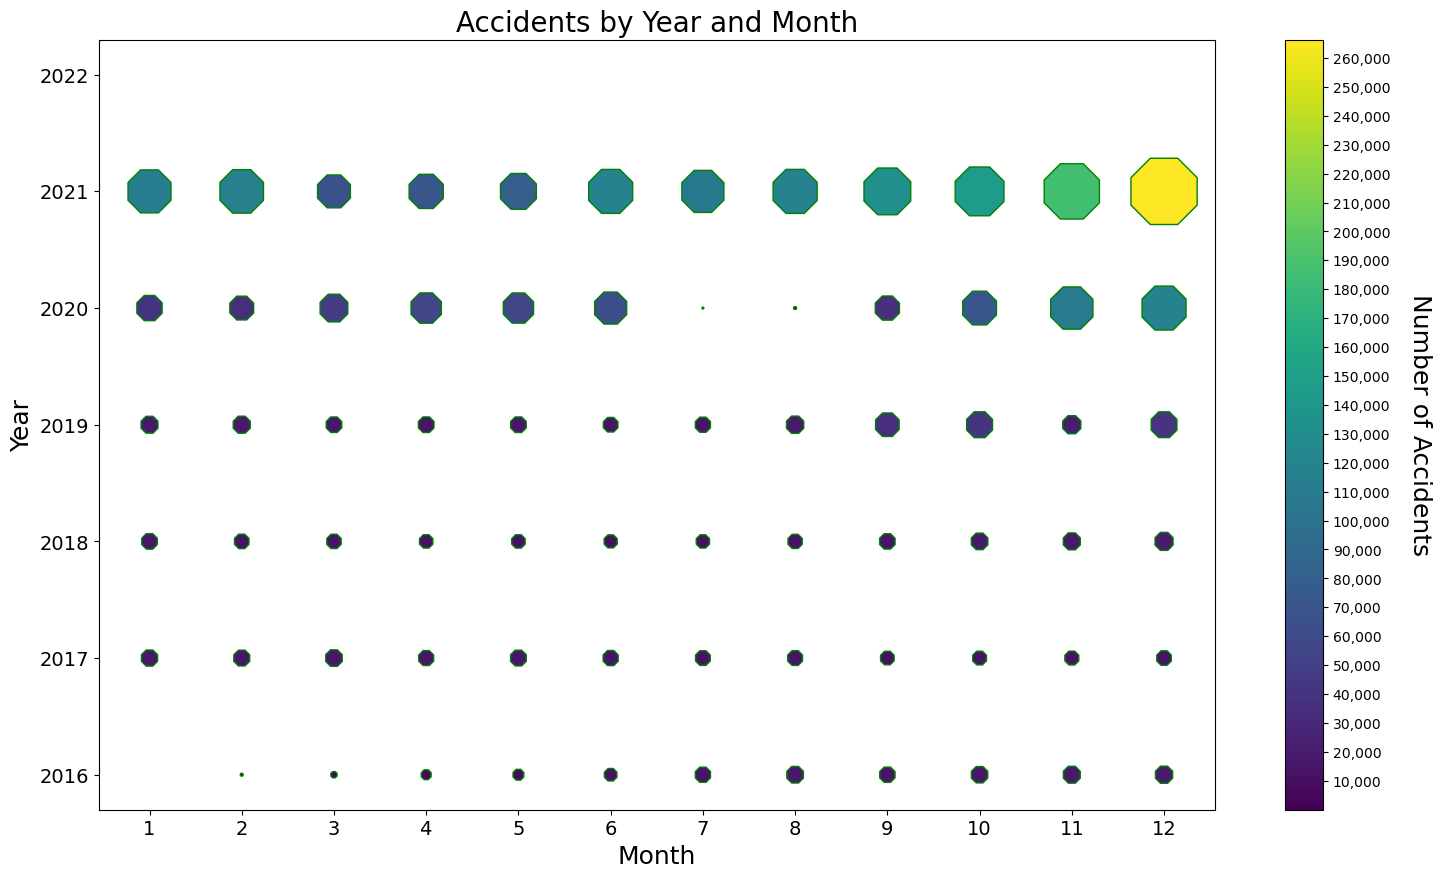

In [32]:
plt.figure(figsize=(18,10))

plt.scatter(x['Month'], x['Year'], marker='8',cmap='viridis', c=x['CountHunderds'], s=x['CountHunderds'],edgecolors='green')
plt.title('Accidents by Year and Month', fontsize=20)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Year",fontsize=18)
cbar=plt.colorbar()
cbar.set_label('Number of Accidents',rotation=270, fontsize=18, color='black',labelpad=30)
ticks=[*range(100,int(x["CountHunderds"].max()),100)]
cb_tick=[*range(10000,int(x['Count'].max()),10000)]
cb_tick=['{:,}'.format(each) for each in cb_tick]
cbar.set_ticks(ticks)
cbar.set_ticklabels(cb_tick)
my_x_tick=[*range(x['Month'].min(),x['Month'].max()+1, 1)]
plt.xticks(my_x_tick, fontsize=14, color='black' )

my_y_tick=[*range(x['Year'].min(),x['Year'].max()+1, 1)]
plt.yticks(my_y_tick, fontsize=14, color='black' )
plt.show()

In [33]:
df3=pd.read_csv(path, usecols=['State', 'Severity','End_Time'])

In [34]:
df3

,Severity,End_Time,State
0,3,2016-02-08 06:37:08,OH
1,2,2016-02-08 11:56:20,OH
2,2,2016-02-08 12:15:39,OH
3,2,2016-02-08 12:51:45,OH
4,3,2016-02-08 13:53:43,OH
...,...,...,...
2845337,2,2019-08-23 18:32:01,CA
2845338,2,2019-08-23 19:38:23,CA
2845339,2,2019-08-23 19:28:49,CA
2845340,2,2019-08-23 19:29:42,CA


In [35]:
df3.dtypes

Severity     int64
End_Time    object
State       object
dtype: object

In [36]:
df3.isna().sum()

Severity    0
End_Time    0
State       0
dtype: int64

In [37]:
df3['End_Time']=pd.to_datetime(df3['End_Time'], format='%Y-%m-%d %H:%M:%S')

In [38]:
df3

,Severity,End_Time,State
0,3,2016-02-08 06:37:08,OH
1,2,2016-02-08 11:56:20,OH
2,2,2016-02-08 12:15:39,OH
3,2,2016-02-08 12:51:45,OH
4,3,2016-02-08 13:53:43,OH
...,...,...,...
2845337,2,2019-08-23 18:32:01,CA
2845338,2,2019-08-23 19:38:23,CA
2845339,2,2019-08-23 19:28:49,CA
2845340,2,2019-08-23 19:29:42,CA


In [39]:
df3.dtypes

Severity             int64
End_Time    datetime64[ns]
State               object
dtype: object

In [40]:
df3['Hour']=df3.End_Time.dt.hour
df3['Day']=df3.End_Time.dt.day
df3['Month']=df3.End_Time.dt.month
df3['Year']=df3.End_Time.dt.year
df3['WeekDay']=df3.End_Time.dt.strftime('%a')
df3['MonthName']=df3.End_Time.dt.strftime('%b')

In [41]:
df3

,Severity,End_Time,State,Hour,Day,Month,Year,WeekDay,MonthName
0,3,2016-02-08 06:37:08,OH,6,8,2,2016,Mon,Feb
1,2,2016-02-08 11:56:20,OH,11,8,2,2016,Mon,Feb
2,2,2016-02-08 12:15:39,OH,12,8,2,2016,Mon,Feb
3,2,2016-02-08 12:51:45,OH,12,8,2,2016,Mon,Feb
4,3,2016-02-08 13:53:43,OH,13,8,2,2016,Mon,Feb
...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:32:01,CA,18,23,8,2019,Fri,Aug
2845338,2,2019-08-23 19:38:23,CA,19,23,8,2019,Fri,Aug
2845339,2,2019-08-23 19:28:49,CA,19,23,8,2019,Fri,Aug
2845340,2,2019-08-23 19:29:42,CA,19,23,8,2019,Fri,Aug


In [42]:
y=df3.groupby(['State']).agg({'State':['count'],'Severity':['sum','mean']}).reset_index()
y

State         Severity          
           count      sum      mean
0     AL   19322    41124  2.128351
1     AR   10935    24672  2.256241
2     AZ   56504   116938  2.069553
3     CA  795868  1625161  2.041998
4     CO   25340    67462  2.662273
5     CT   29762    67412  2.265036
6     DC    9133    20010  2.190956
7     DE    4842    12116  2.502272
8     FL  401388   830616  2.069359
9     GA   40086   100998  2.519533
10    IA    9607    22641  2.356719
11    ID    8544    18098  2.118212
12    IL   47105   120065  2.548880
13    IN   20850    51323  2.461535
14    KS    9033    20053  2.219971
15    KY    6638    15571  2.345737
16    LA   47232    97029  2.054306
17    MA    6392    15096  2.361702
18    MD   65085   150463  2.311792
19    ME    2193     4614  2.103967
20    MI   43843   102417  2.335994
21    MN   97185   198946  2.047085
22    MO   29633    66573  2.246583
23    MS    5320    11700  2.199248
24    MT   15964    32525  2.037397
25    NC   91362   193538  2.118364
26    ND    2258     4543  2.011957
27    NE    3320     7689  2.315964
28    NH    3866     8224  2.127263
29    NJ   52902   118574  2.241390
30    NM    2370     5634  2.377215
31    NV    6197    13795  2.226077
32    NY  108049   239458  2.216198
33    OH   24409    60696  2.486624
34    OK    8806    19295  2.191120
35    OR  126341   261994  2.073705
36    PA   99975   220289  2.203441
37    RI    4451     9595  2.155695
38    SC   89216   182913  2.050226
39    SD     201      496  2.467662
40    TN   52613   109501  2.081254
41    TX  149037   325637  2.184941
42    UT   49193   101972  2.072897
43    VA  113535   247126  2.176650
44    VT     365      875  2.397260
45    WA   32554    75039  2.305062
46    WI    7896    22387  2.835233
47    WV    7632    16683  2.185928
48    WY     990     2546  2.571717

In [43]:
y.columns=['State','Count','TotalSeverity', 'AverSeverity']

In [44]:
y

,State,Count,TotalSeverity,AverSeverity
0,AL,19322,41124,2.128351
1,AR,10935,24672,2.256241
2,AZ,56504,116938,2.069553
3,CA,795868,1625161,2.041998
4,CO,25340,67462,2.662273
5,CT,29762,67412,2.265036
6,DC,9133,20010,2.190956
7,DE,4842,12116,2.502272
8,FL,401388,830616,2.069359
9,GA,40086,100998,2.519533


In [45]:
y=y.sort_values('Count', ascending=False)

In [46]:
y

,State,Count,TotalSeverity,AverSeverity
3,CA,795868,1625161,2.041998
8,FL,401388,830616,2.069359
41,TX,149037,325637,2.184941
35,OR,126341,261994,2.073705
43,VA,113535,247126,2.176650
32,NY,108049,239458,2.216198
36,PA,99975,220289,2.203441
21,MN,97185,198946,2.047085
25,NC,91362,193538,2.118364
38,SC,89216,182913,2.050226


In [47]:
y.reset_index(inplace=True, drop=True)
y

,State,Count,TotalSeverity,AverSeverity
0,CA,795868,1625161,2.041998
1,FL,401388,830616,2.069359
2,TX,149037,325637,2.184941
3,OR,126341,261994,2.073705
4,VA,113535,247126,2.176650
5,NY,108049,239458,2.216198
6,PA,99975,220289,2.203441
7,MN,97185,198946,2.047085
8,NC,91362,193538,2.118364
9,SC,89216,182913,2.050226


C:\Users\Joker\AppData\Local\Temp\ipykernel_39640\2564800069.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


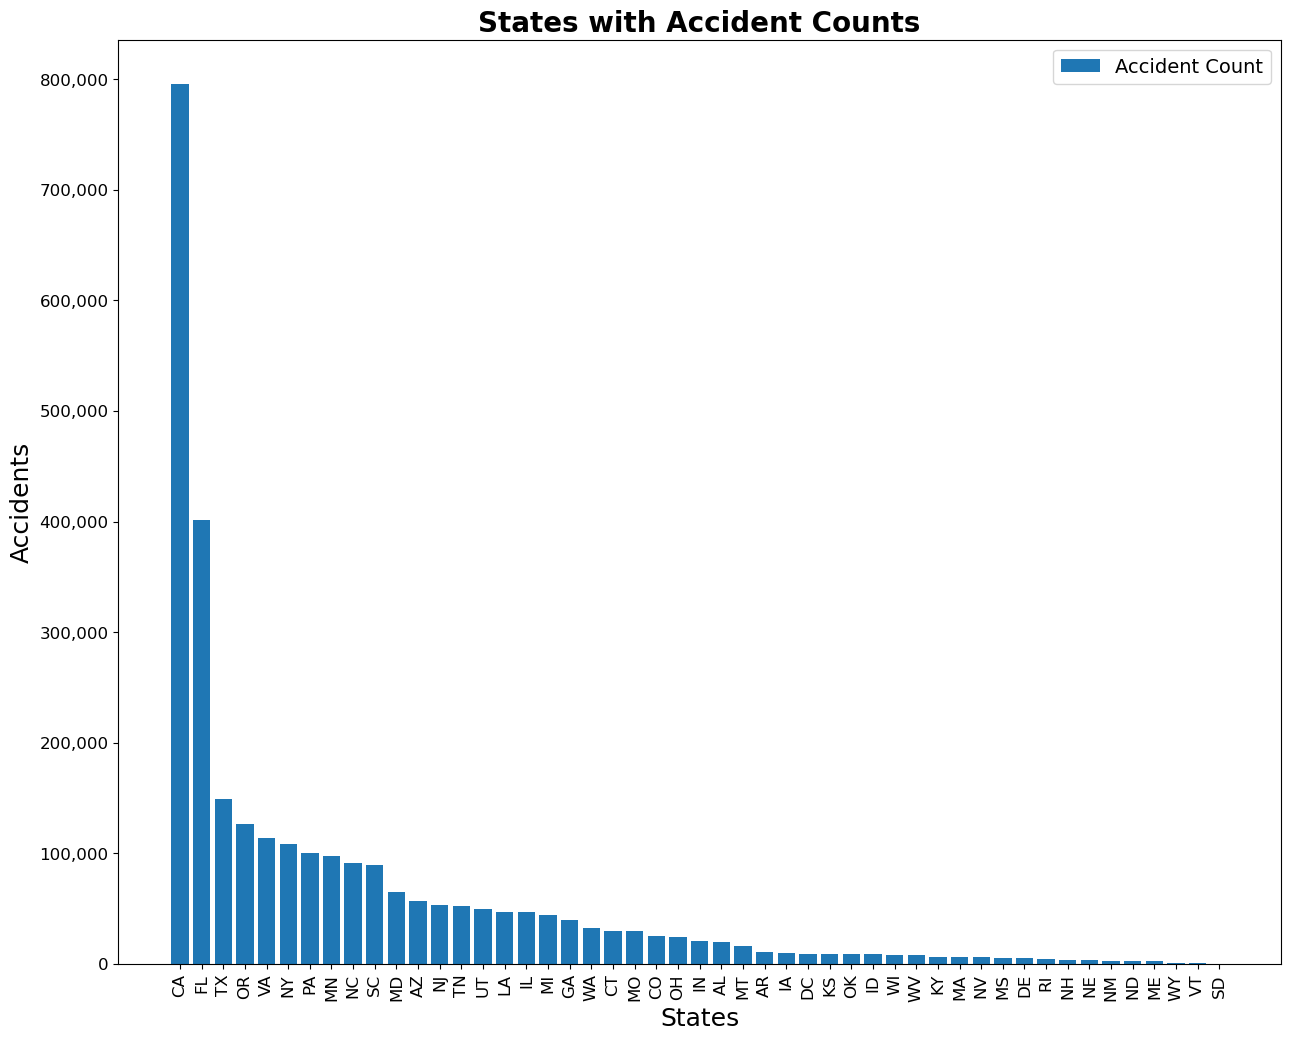

In [48]:
plt.figure(figsize=(15,12))
plt.bar(y.loc[0:48,'State'],y.loc[0:48,'Count'], label='Accident Count')
plt.legend(loc='upper right', fontsize=14)
plt.tick_params(axis='y',labelsize=12)
plt.tick_params(axis='x',labelsize=12)
plt.title('States with Accident Counts',size=20,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('States',fontsize=18)
plt.ylabel('Accidents',fontsize=18)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [49]:
def pick_color_to_mean(x):
    colors=[]
    avg=x.Count.mean()
    for each in x.Count:
        if each>avg*1.01:
            colors.append('pink')
        elif each<avg*.99:
            colors.append('green')
        else:
            colors.append('gray')
    return colors

C:\Users\Joker\AppData\Local\Temp\ipykernel_39640\1963568181.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


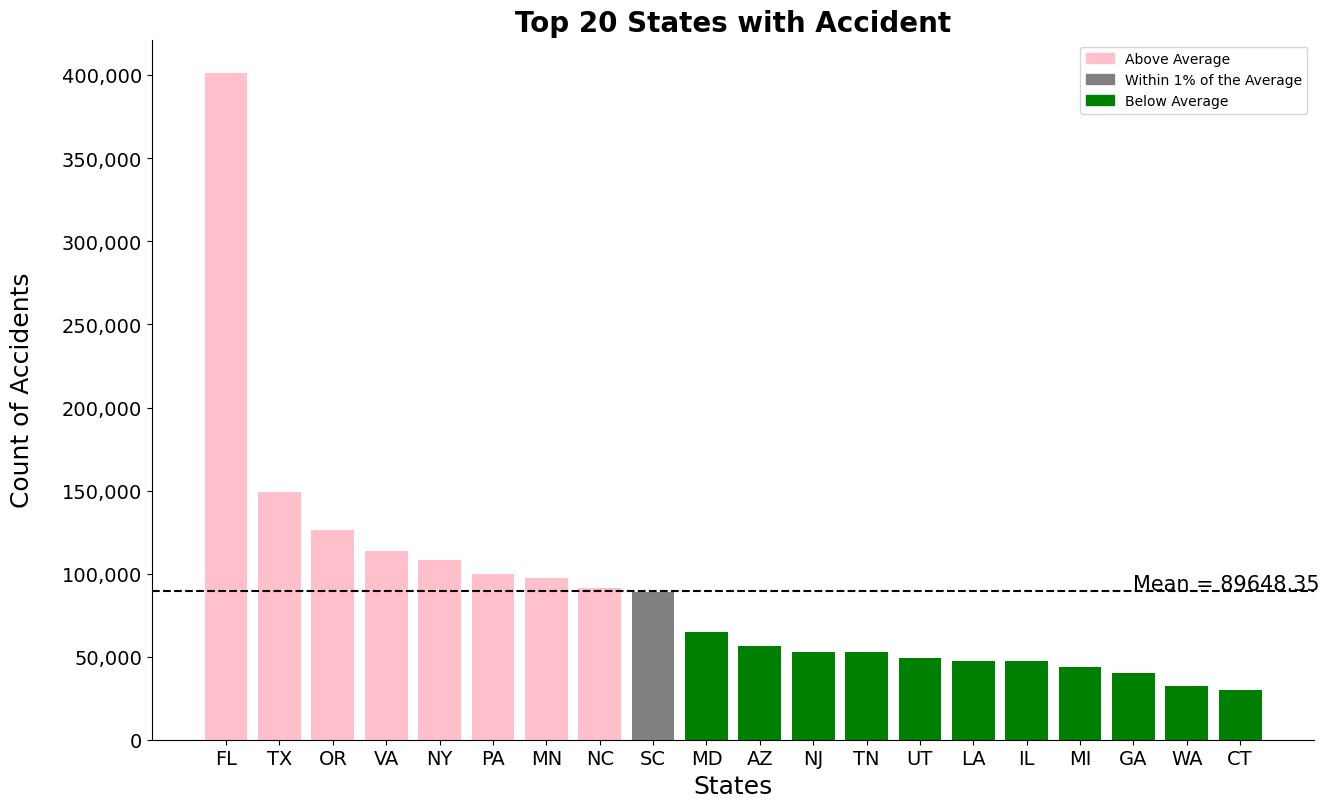

In [50]:
# remove CA because it is a extreme outlier
#severity is from 1 to 4
bottom1=1
top1=20
d1=y.loc[bottom1:top1]
mycol=pick_color_to_mean(d1)

Above=mpatches.Patch(color='pink', label='Above Average')
At=mpatches.Patch(color='gray', label='Within 1% of the Average')
Below=mpatches.Patch(color='green', label='Below Average')
fig=plt.figure(figsize=(15,20))
ax1=fig.add_subplot(2,1,1)
ax1.bar(d1.State,d1.Count, label='Count',color=mycol)
ax1.legend(handles=[Above,At,Below],fontsize=10)
plt.axhline(d1.Count.mean(),color='black', linestyle='dashed')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Top '+str(top1)+' States with Accident',size=20,fontweight='bold')
ax1.text(top1-3,d1.Count.mean()+3,"Mean = "+ str(d1.Count.mean()),rotation=0,fontsize=15)
ax1.tick_params(axis='y',labelsize=14)
ax1.tick_params(axis='x',labelsize=14)
ax1.set_xlabel('States',fontsize=18)
ax1.set_ylabel('Count of Accidents',fontsize=18,labelpad=20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()




In [51]:
def autolabel(these_bars, this_ax, place_of_decimals,symbol):
    for each_bar in these_bars:
        height=each_bar.get_height()
        this_ax.text(each_bar.get_x()+each_bar.get_width()/2,height*1.01,symbol+format(height,place_of_decimals),
                    fontsize=8,color='black',ha="center",va='bottom')

In [52]:
def autolabel2(these_bars, this_ax, place_of_decimals,symbol):
    for each_bar in these_bars:
        height=each_bar.get_height()
        this_ax.text(each_bar.get_x()+each_bar.get_width()/2,height*1.08,symbol+format(height,place_of_decimals),
                    fontsize=8,color='black',ha="center",va='bottom')

C:\Users\Joker\AppData\Local\Temp\ipykernel_39640\2565662266.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax2.get_yticks()])


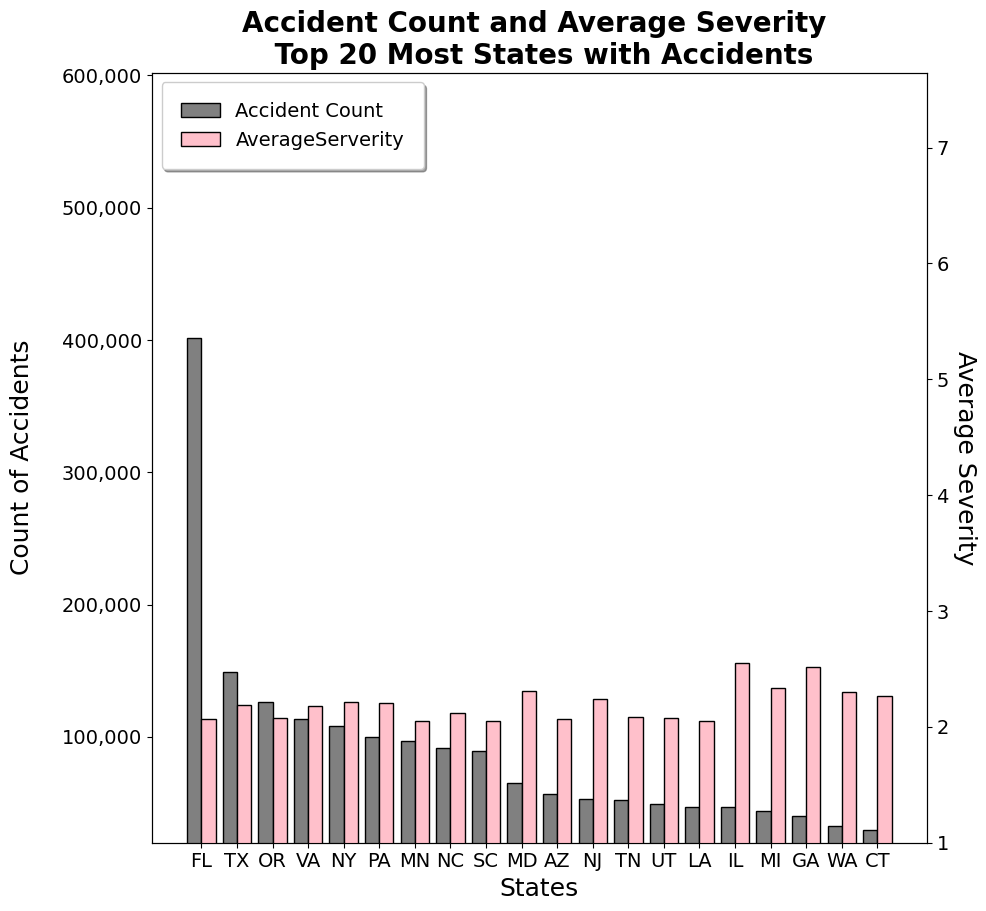

In [53]:
fig=plt.figure(figsize=(10,10))
ax2=fig.add_subplot(1,1,1)
ax3=ax2.twinx()
bar_width=.4
stacked=True
x_pos=np.arange(20)
count_bars=ax2.bar(x_pos-(.5*bar_width),d1.Count, bar_width,color='gray', edgecolor='black',label='Accident Count')
aver_sevr_bars=ax3.bar(x_pos+(.5*bar_width),d1.AverSeverity, bar_width, color='pink',edgecolor='black',label='AverageServerity')


ax2.set_xlabel('States', fontsize=18)
ax2.set_ylabel('Count of Accidents',fontsize=18,labelpad=20)

ax3.set_ylabel('Average Severity', fontsize=18, rotation=270, labelpad=20)
ax2.tick_params(axis='y',labelsize=14)
ax3.tick_params(axis='y',labelsize=14)
plt.title('Accident Count and Average Severity \n Top 20 Most States with Accidents',fontsize=20,fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(d1.State,fontsize=14)
ax2.tick_params(axis='y',labelsize=14)

cnt_color,cnt_label= ax2.get_legend_handles_labels()
sev_color,sev_label= ax3.get_legend_handles_labels()
legend=ax2.legend(cnt_color+sev_color,cnt_label+sev_label, loc='upper left', frameon=True,ncol=1,shadow=True,
                 borderpad=1,fontsize=14)

ax2.set_yticklabels
ax2.set_ylim(20000,d1.Count.max()*1.5)
ax3.set_ylim(1,d1.AverSeverity.max()*3)
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax2.get_yticks()])

#autolabel2(count_bars,ax2,',.0f','')
#autolabel(aver_sevr_bars,ax3,'.2f','')

plt.show()

In [55]:
df2

,End_Time,Year,Quarter,Month,Day,Hour,DayofWeek,DayofYear,MonthName,MonthNameAbb,DayName,DayNameAbb
0,2016-02-08 06:37:08,2016,1,2,8,6,0,39,February,Feb,Monday,Mon
1,2016-02-08 11:56:20,2016,1,2,8,11,0,39,February,Feb,Monday,Mon
2,2016-02-08 12:15:39,2016,1,2,8,12,0,39,February,Feb,Monday,Mon
3,2016-02-08 12:51:45,2016,1,2,8,12,0,39,February,Feb,Monday,Mon
4,2016-02-08 13:53:43,2016,1,2,8,13,0,39,February,Feb,Monday,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2019-08-23 18:32:01,2019,3,8,23,18,4,235,August,Aug,Friday,Fri
2845338,2019-08-23 19:38:23,2019,3,8,23,19,4,235,August,Aug,Friday,Fri
2845339,2019-08-23 19:28:49,2019,3,8,23,19,4,235,August,Aug,Friday,Fri
2845340,2019-08-23 19:29:42,2019,3,8,23,19,4,235,August,Aug,Friday,Fri


In [62]:
hr=df2.groupby(['Hour', 'DayName'])['DayName'].count().reset_index(name='Totalacc')

In [63]:
hr

,Hour,DayName,Totalacc
0,0,Friday,16713
1,0,Monday,10402
2,0,Saturday,18400
3,0,Sunday,13442
4,0,Thursday,16340
...,...,...,...
163,23,Saturday,13807
164,23,Sunday,10953
165,23,Thursday,17847
166,23,Tuesday,16468


In [64]:
hr[hr.DayName=="Friday"]

,Hour,DayName,Totalacc
0,0,Friday,16713
7,1,Friday,13665
14,2,Friday,12280
21,3,Friday,10214
28,4,Friday,8566
35,5,Friday,7577
42,6,Friday,8368
49,7,Friday,11218
56,8,Friday,15126
63,9,Friday,16199


<function matplotlib.pyplot.show(close=None, block=None)>

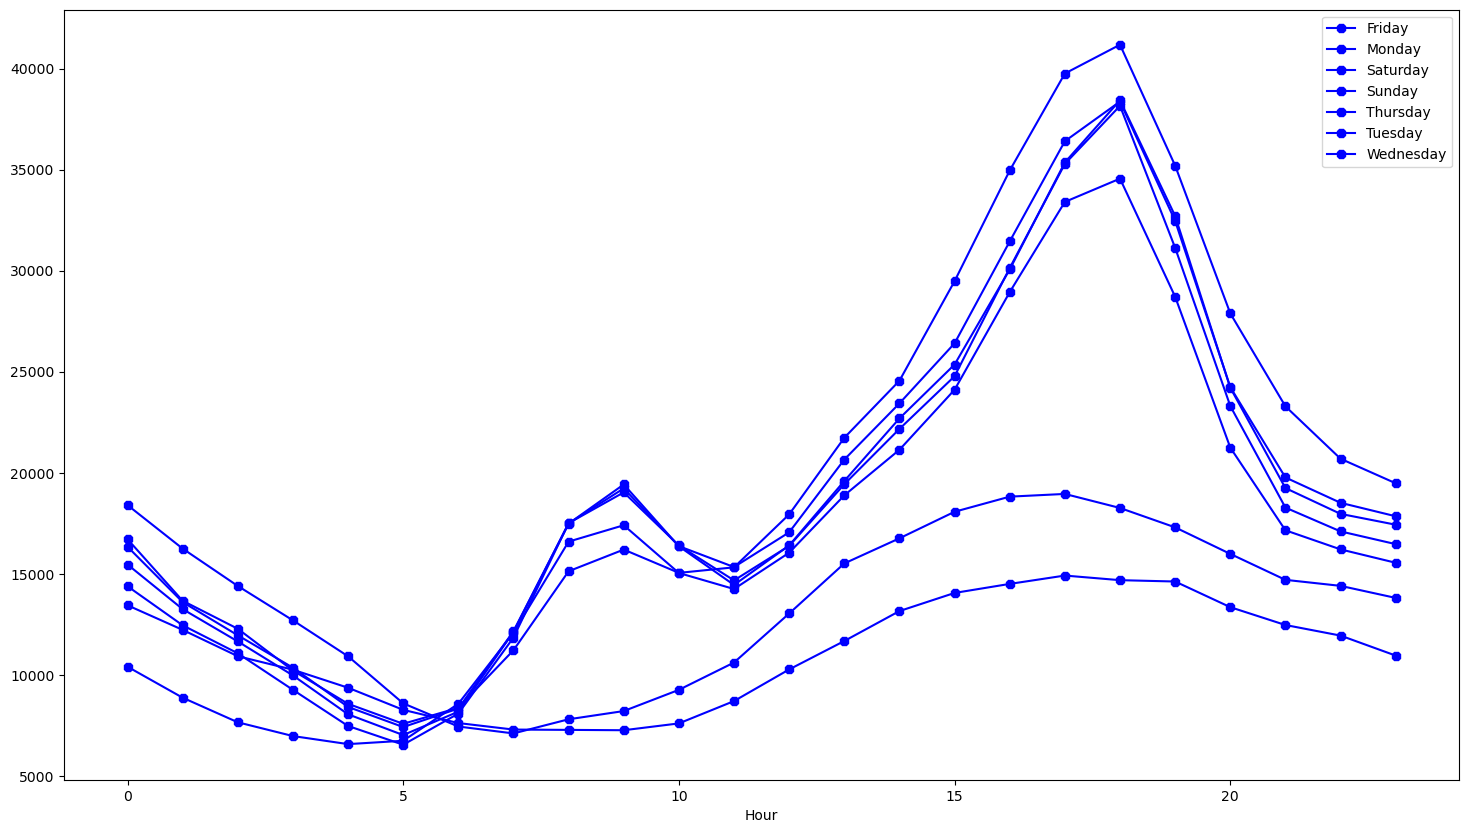

In [66]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(1,1,1)
MyColor={''}
for key,grp in hr.groupby(['DayName']):
    grp.plot(ax=ax, kind='line',x='Hour', y='Totalacc', color='blue',label=key,marker='8')
    
plt.show
